## Loan default prediction using Deep learning

We are building a ANN model to predict **whether a customer will default a loan or not**. The dataset for this task was obtained at https://github.com/brunokatekawa/credit_risk/tree/master/data.                    

#### Dataset description:
It contains following columns.

* person_age - The person's age in years                            
* person_income - The person's anual income
* person_home_ownership - The type of home ownership (RENT; OWN; MORTGAGE; OTHER)
* person_emp_length - The person's employment length in years    
* loan_intent - The person's intent for the loan (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,   DEBTCONSOLIDATION)
* loan_grade - The loan grade (A, B, C, D, E, F, G)      
* loan_amnt - The loan amount     
* loan_int_rate - The loan interest rate      
* loan_status - Shows whether the loan is currently in default with 1 being default and 0 being non-default
* loan_percent_income - The percentage of person's income dedicated for the mortgage     
* cb_person_default_on_file - If the person has a default history (Yes; No)       
* cb_person_cred_hist_length - The person's credit history        


In [ ]:
!pip install scikit-plot

### Loading libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Logistic regression from sklearn
from sklearn.linear_model  import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import classification_report

# For pandas profiling
from pandas_profiling import ProfileReport

### Import the dataset

In [ ]:
data = pd.read_csv('bankloans.csv')
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.shape

(32581, 12)

* The dataset has 32581 rows and 12 columns 

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

* **person_emp_length** & **loan_int_rate** columns have contains some null values.

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = ['person_home_ownership','loan_intent', 'loan_grade', 'cb_person_default_on_file']
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  category
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


### Summary of the dataset.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


* person_age : Average age of customers is ~28 years. There is a huge difference between 75th percentile & max value of the age, which indicates there might be outliers present in the data.    
* person_income : Average income of customers is 66074.8. Also the difference between 75th percentile & its max value is high, which indicates there might be presence of outliers in the data.    
* person_emp_length : 75% of customers have 7 years of employment history. Also some outliers present in the data. 
* loan_amnt : The average loan amount taken by customers is 9589.37.    
* loan_int_rate : The average loan interest of customers is 11.011. 75% of customers have got the loans with 13.47% interest rates.   

### EDA

### Univariate analysis

In [ ]:
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on person_age

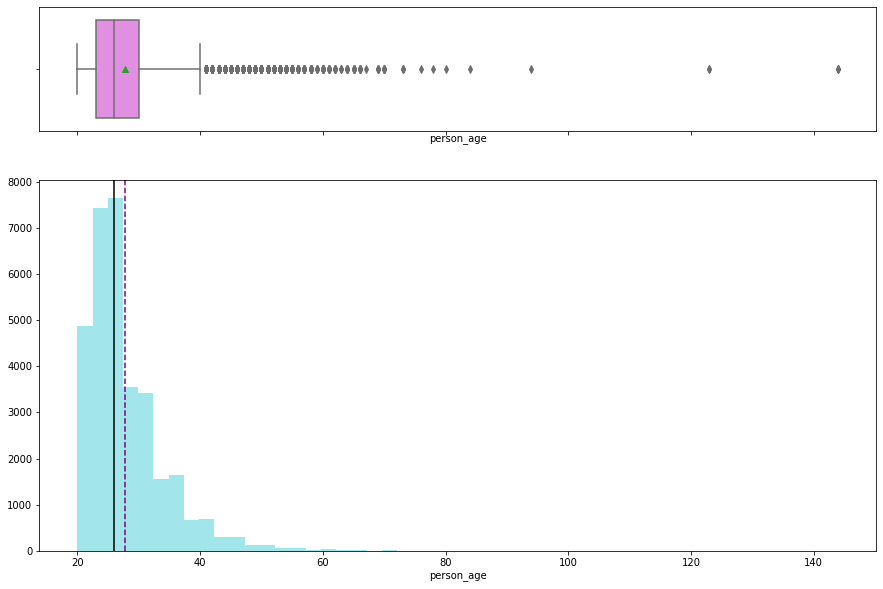

In [ ]:
histogram_boxplot(df['person_age'])

### Observations on person_income

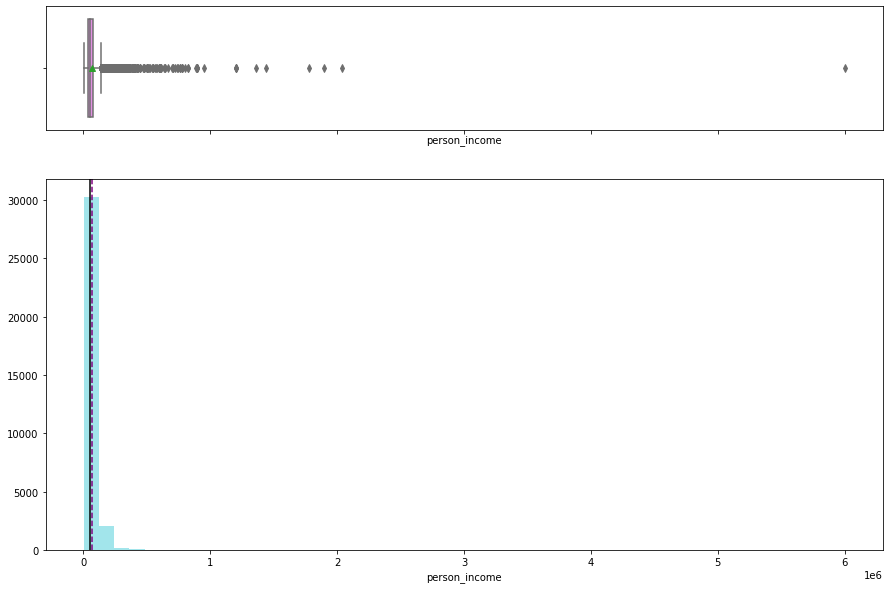

In [ ]:
histogram_boxplot(df['person_income'])

### Observations on person_emp_length

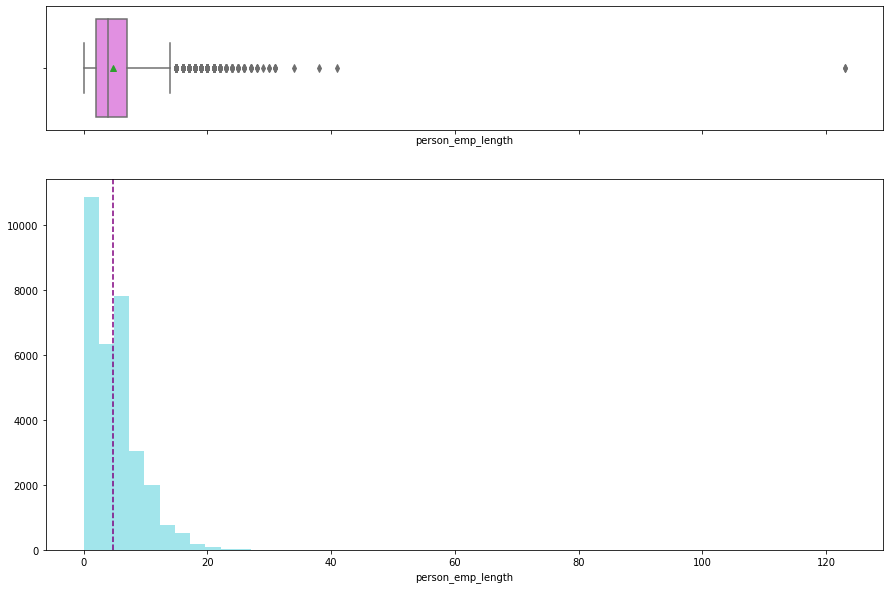

In [ ]:
histogram_boxplot(df['person_emp_length'])

### Observations on loan_amnt

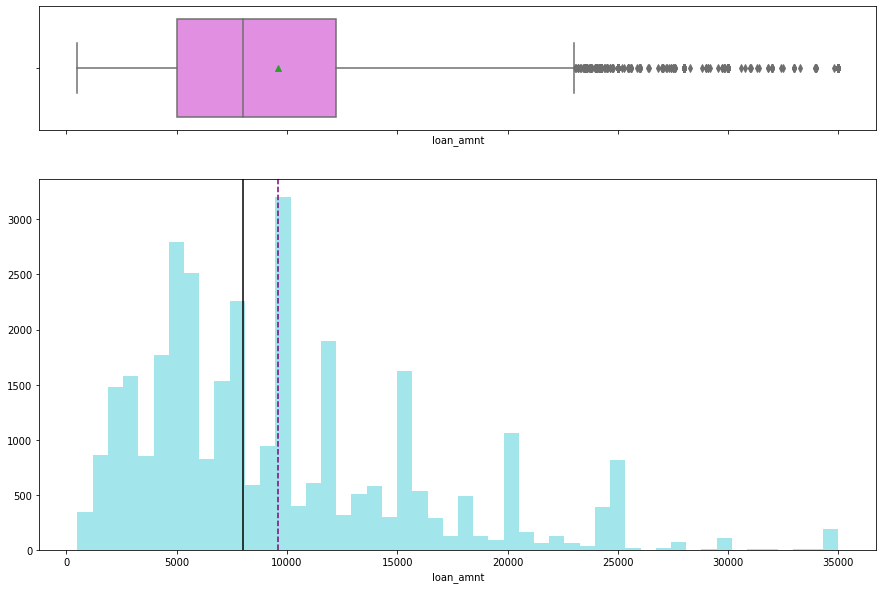

In [ ]:
histogram_boxplot(df['loan_amnt'])

### Observations on loan_int_rate

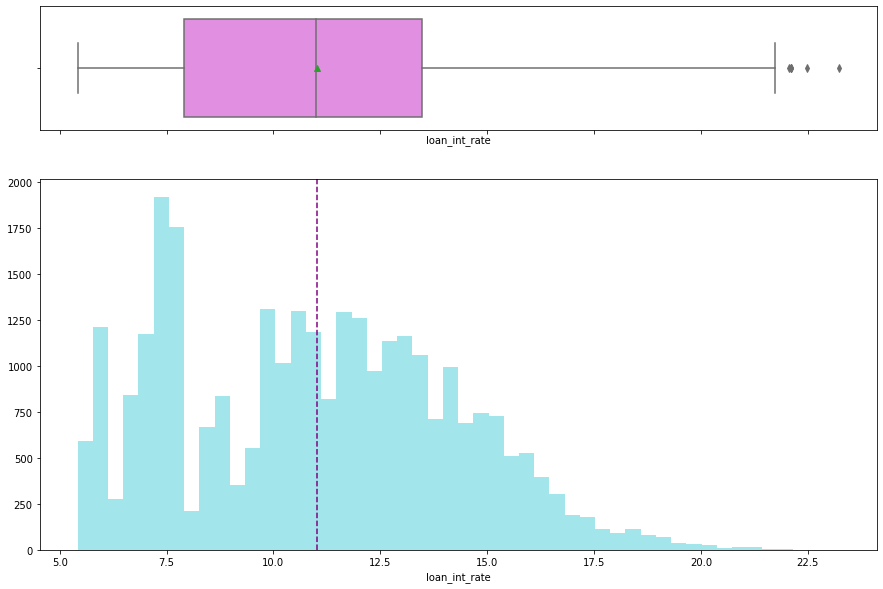

In [ ]:
histogram_boxplot(df['loan_int_rate'])

### Observations on loan_percent_income

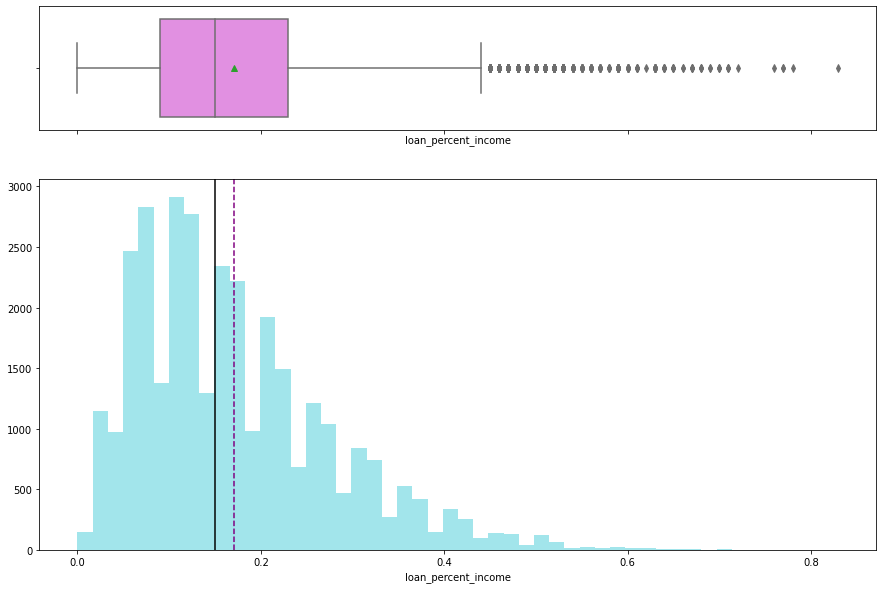

In [ ]:
histogram_boxplot(df['loan_percent_income'])

### Observations on cb_person_cred_hist_length

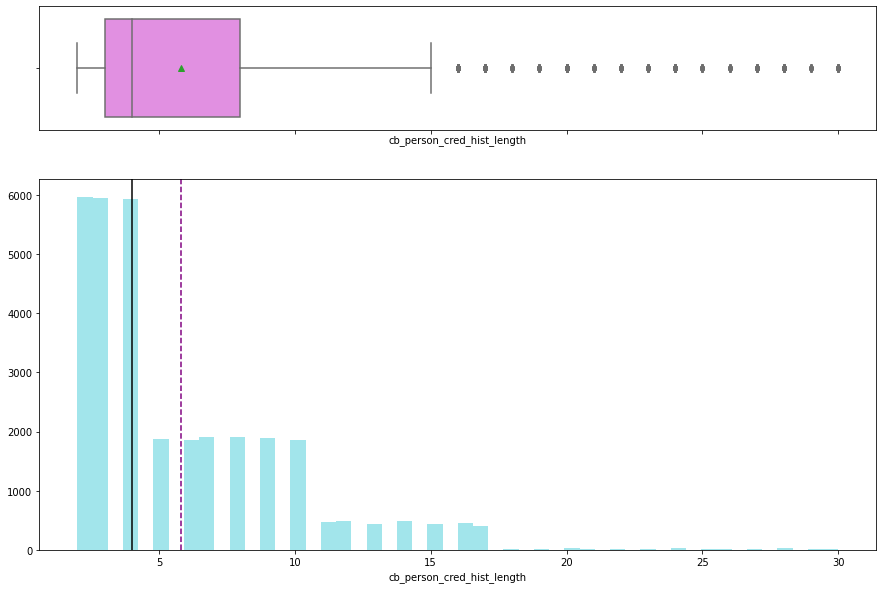

In [ ]:
histogram_boxplot(df['cb_person_cred_hist_length'])

In [ ]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on person_home_ownership

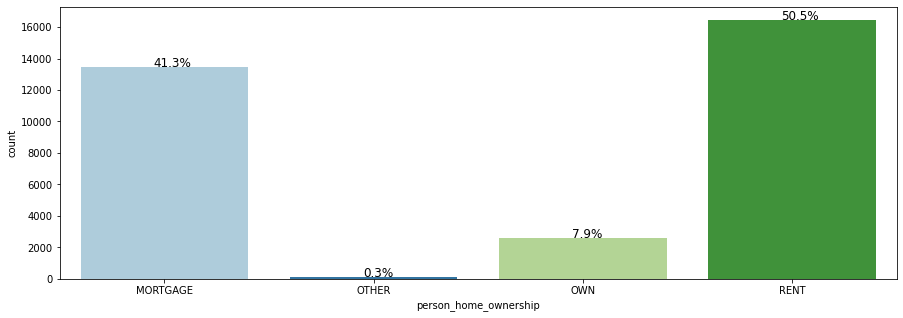

In [ ]:
perc_on_bar('person_home_ownership')

### Observations on loan_intent

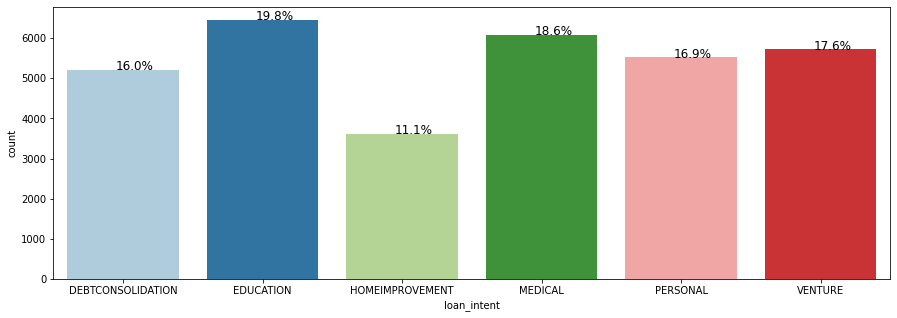

In [ ]:
perc_on_bar('loan_intent')

### Observations on loan_grade

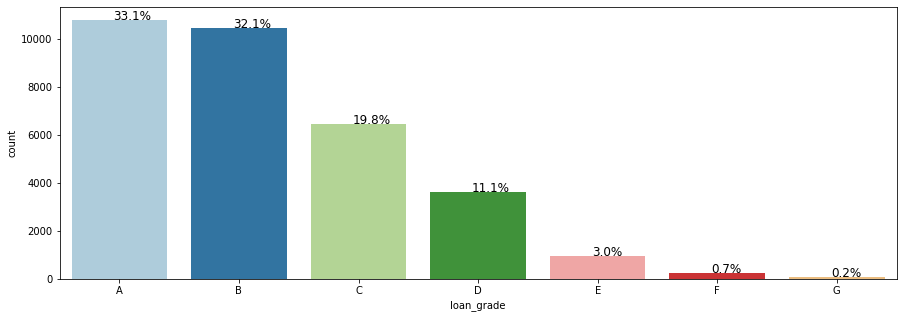

In [ ]:
perc_on_bar('loan_grade')

### Observations on cb_person_default_on_file

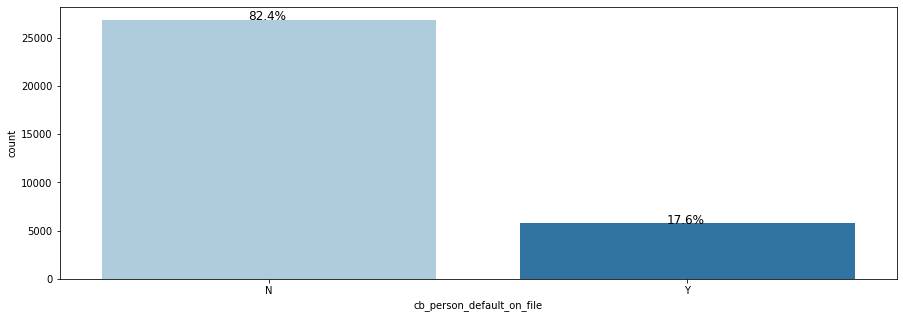

In [ ]:
perc_on_bar('cb_person_default_on_file')

### Observations on loan_status

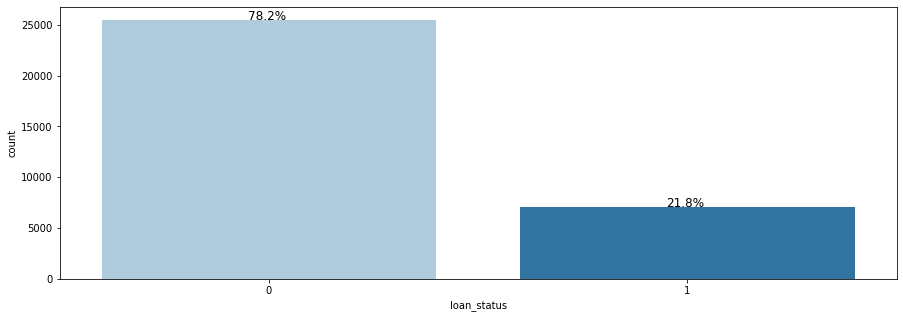

In [ ]:
perc_on_bar('loan_status')

## Bivariate Analysis

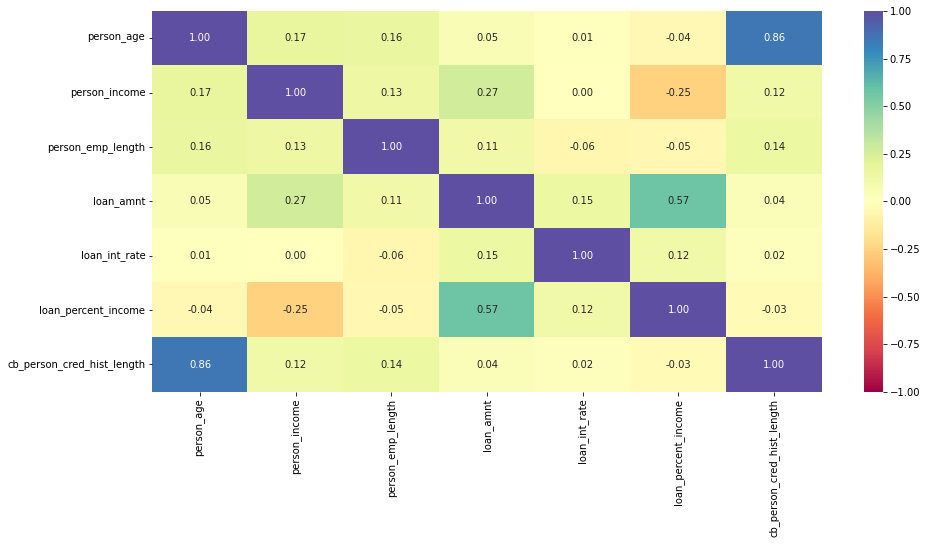

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.drop('loan_status',axis=1).corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

In [ ]:
# Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['loan_status'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['loan_status'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### loan_status vs person_home_ownership

loan_status                0     1    All
person_home_ownership                    
All                    25473  7108  32581
RENT                   11254  5192  16446
MORTGAGE               11754  1690  13444
OWN                     2391   193   2584
OTHER                     74    33    107
------------------------------------------------------------------------------------------------------------------------


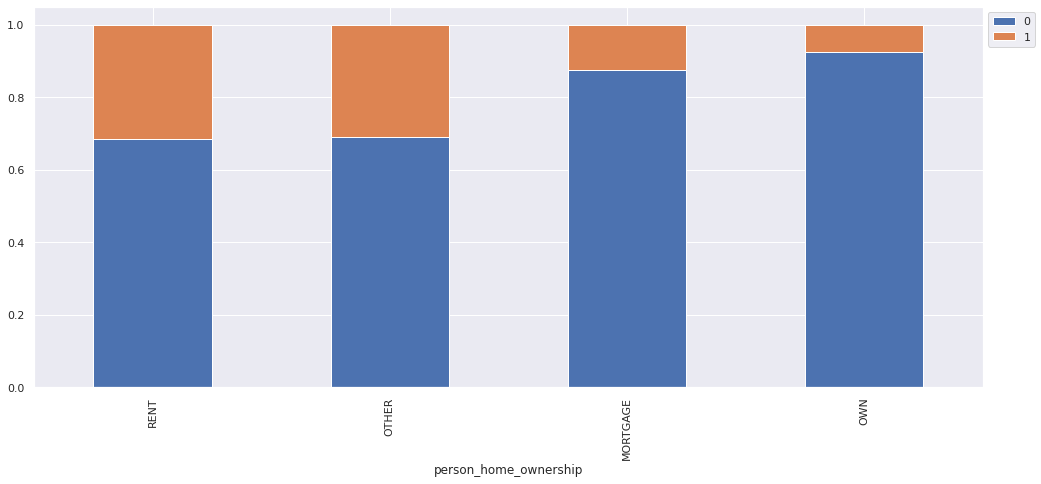

In [ ]:
stacked_plot(df['person_home_ownership'])

### loan_status vs loan_intent

loan_status            0     1    All
loan_intent                          
All                25473  7108  32581
MEDICAL             4450  1621   6071
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
PERSONAL            4423  1098   5521
HOMEIMPROVEMENT     2664   941   3605
VENTURE             4872   847   5719
------------------------------------------------------------------------------------------------------------------------


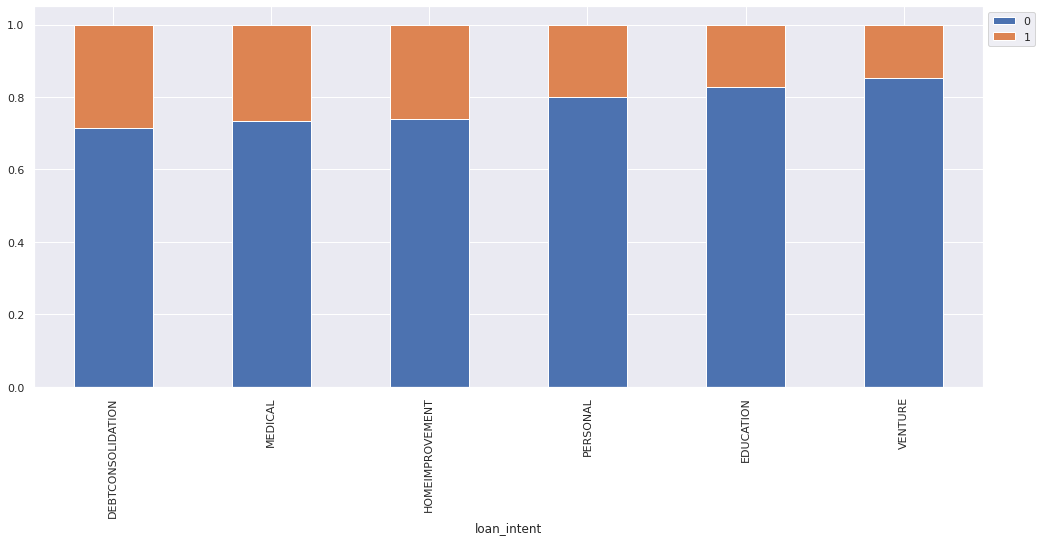

In [ ]:
stacked_plot(df['loan_intent'])

### loan_status vs loan_grade

loan_status      0     1    All
loan_grade                     
All          25473  7108  32581
D             1485  2141   3626
B             8750  1701  10451
C             5119  1339   6458
A             9704  1073  10777
E              343   621    964
F               71   170    241
G                1    63     64
------------------------------------------------------------------------------------------------------------------------


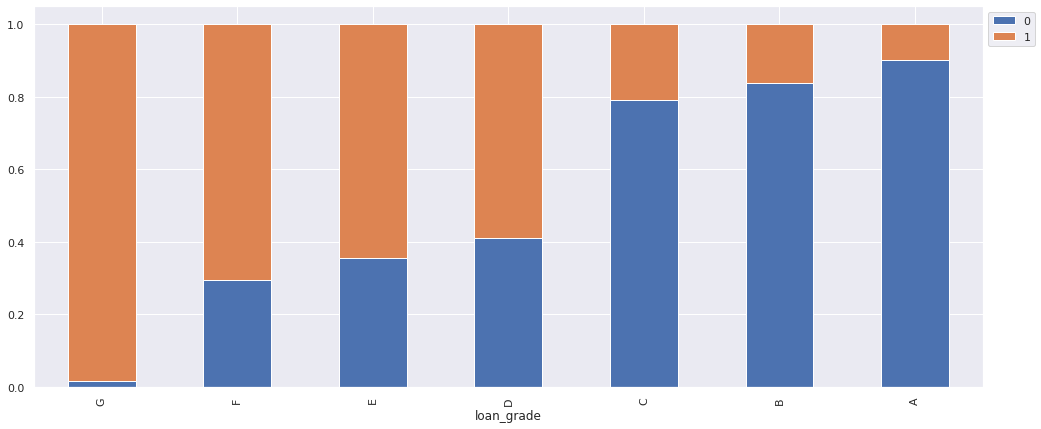

In [ ]:
stacked_plot(df['loan_grade'])

### loan_status vs cb_person_default_on_file

loan_status                    0     1    All
cb_person_default_on_file                    
All                        25473  7108  32581
N                          21900  4936  26836
Y                           3573  2172   5745
------------------------------------------------------------------------------------------------------------------------


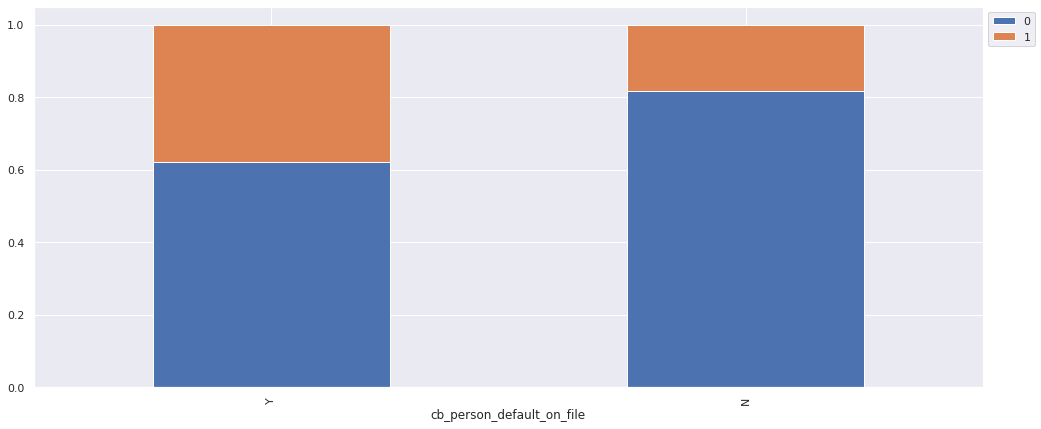

In [ ]:
stacked_plot(df['cb_person_default_on_file'])

In [ ]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='loan_status'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of a customer who will not default a loan',fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of a customer who will default a loan",fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t loan_status',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(df[target],df[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t loan_status - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df[target],df[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### loan_status vs person_age

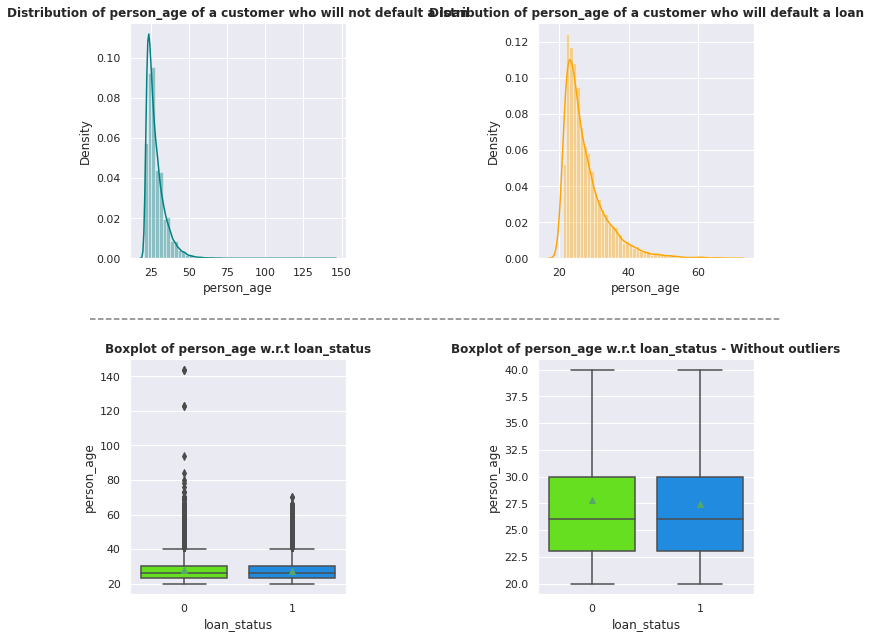

In [ ]:
plot('person_age')

### loan_status vs person_income

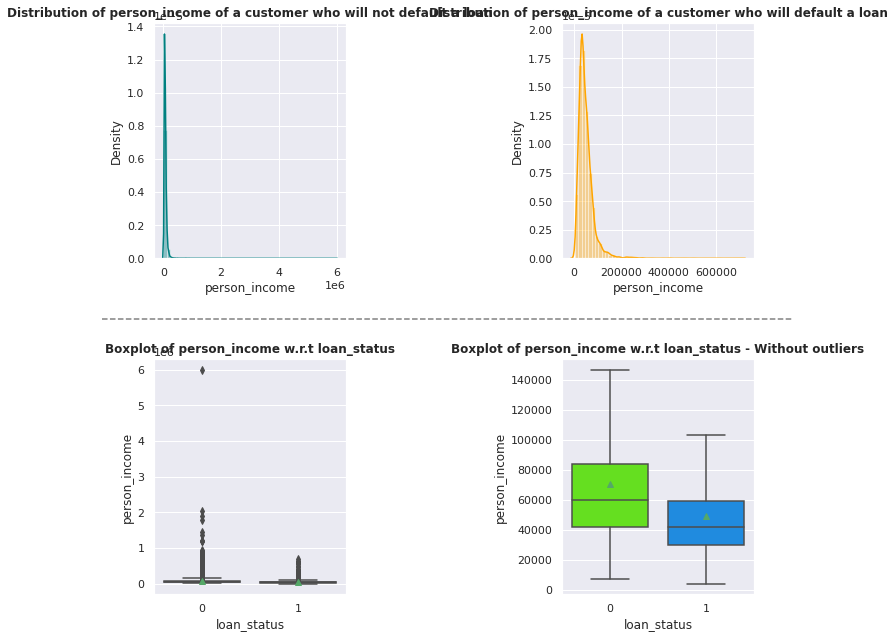

In [ ]:
plot('person_income')

### loan_status vs person_emp_length

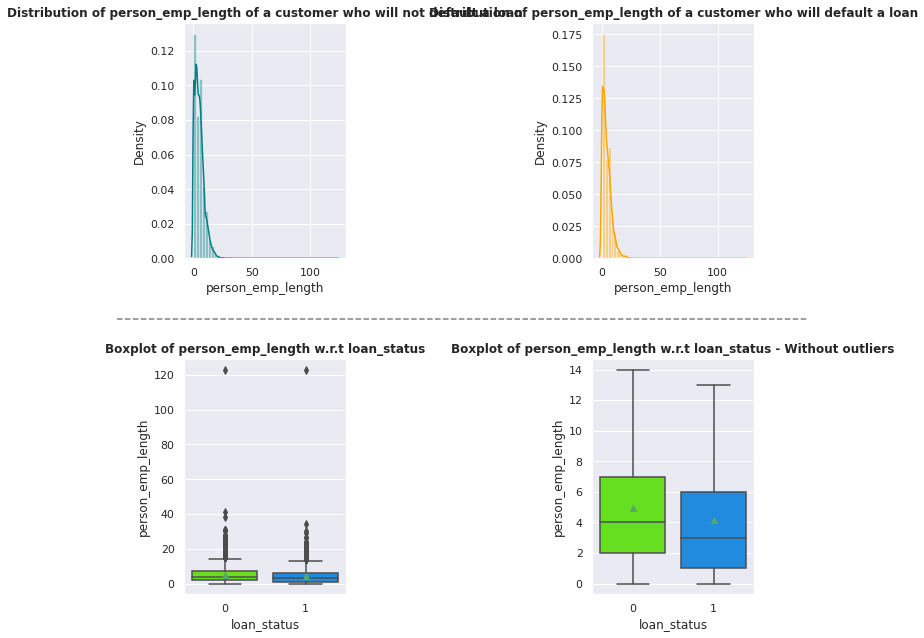

In [ ]:
plot('person_emp_length')

### loan_status vs loan_amnt

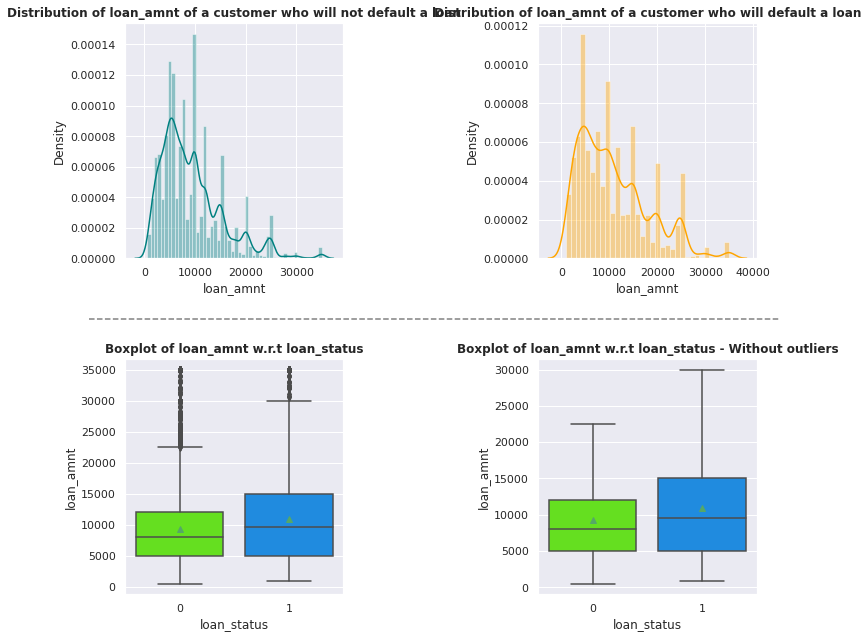

In [ ]:
plot('loan_amnt')

### loan_status vs loan_int_rate

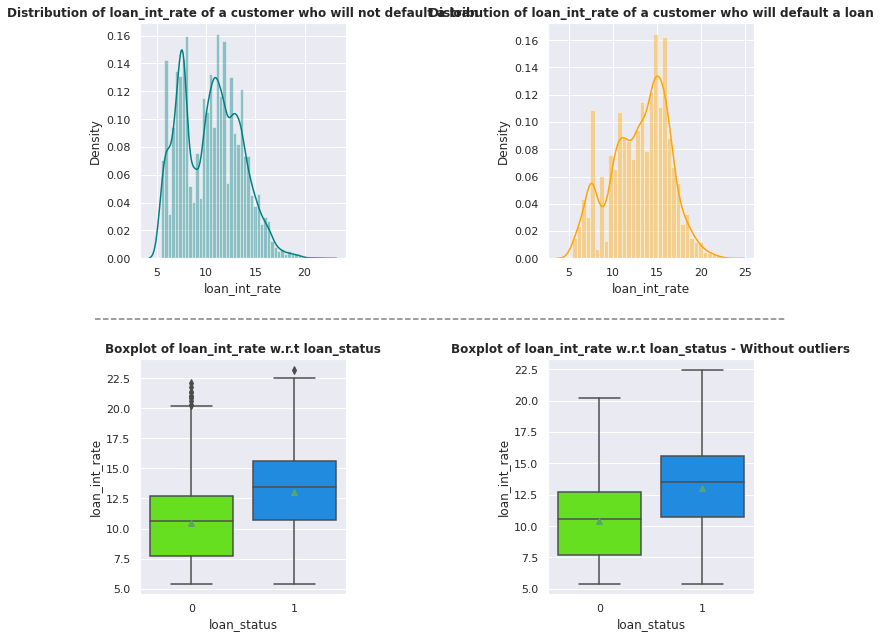

In [ ]:
plot('loan_int_rate')

### loan_status vs loan_percent_income

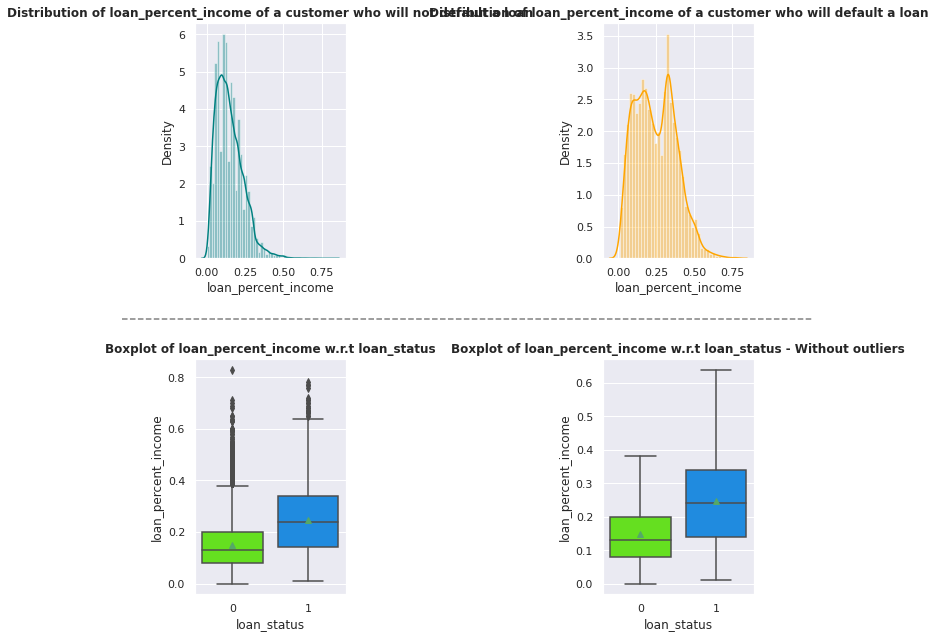

In [ ]:
plot('loan_percent_income')

### loan_status vs cb_person_cred_hist_length

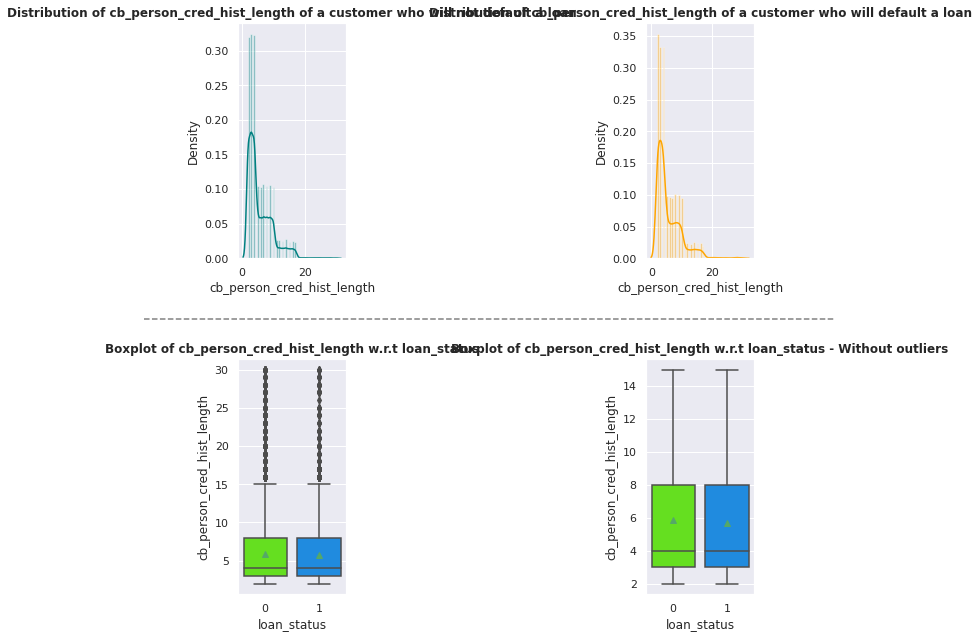

In [ ]:
plot('cb_person_cred_hist_length')

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [ ]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [ ]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

person_age                     4.585495
person_income                  4.554802
person_emp_length              2.618090
loan_amnt                      5.184003
loan_int_rate                  0.018416
loan_status                   21.816396
loan_percent_income            1.998097
cb_person_cred_hist_length     3.505110
dtype: float64

All the numerical columns have outliers.

**Outlier treatment**

Using scipy.stats.zscore() to remove outliers from dataset.

In [ ]:
from scipy.stats import zscore

df_numeric = df.select_dtypes(include=['float64','int64'])
# calculate z-scores of `df`
z_scores = zscore(df_numeric)
# Absolute values
abs_z_scores = np.abs(z_scores)

# Check outliers, if zscore>3 means the data point is an outlier
# Let's find outliers
filtered_entries = (abs_z_scores > 3)
df_outliers = df_numeric[filtered_entries]
print(f'Number of outliers present in our dataset is {len(df_outliers)}')

Number of outliers present in our dataset is 1748


In [ ]:
df = df.drop(df_outliers.index, axis=0)

### Data Preparation

In [ ]:
# Drop null values  
df = df.dropna().reset_index(drop=True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
2,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
3,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2
4,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2


In [ ]:
df.shape

(27430, 12)

In [ ]:
# Encode the categorical columns
df = pd.get_dummies(df)
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,21,9900,2.0,2500,7.14,1,0.25,2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,21,10000,6.0,1600,14.74,1,0.16,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,21,10000,2.0,4500,8.63,1,0.45,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,24,10800,8.0,1750,10.99,1,0.16,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Features
X = df.drop('loan_status', axis=1)
# Target
y = df['loan_status']
# Split the data into train(80%), test (10%), & valid(10%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
col_list = X_train.columns.tolist()
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')
print(f'Validation shape : {X_val.shape}')

Train shape : (21944, 26)
Test shape : (2743, 26)
Validation shape : (2743, 26)


### Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
X_val_s = scaler.transform(X_val)

### Building a logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
#Logistic regression model
lr_model=LogisticRegression(random_state=42)
#fitting the lr model
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Accuracy of the model
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of the trained lr_model :',lr_score)

Accuracy of the trained lr_model : 0.826877506379876


In [ ]:
#Get predictions
y_pred = lr_model.predict(X_test_s)
y_pred_prob = lr_model.predict_proba(X_test_s)

In [ ]:
df_results = X_test.copy()
df_results['Non_default_pred_proba'] = [round(y_pred_prob[i][0], 3) for i in range(len(y_pred))]
df_results['default_pred_proba'] = [round(y_pred_prob[i][1], 3) for i in range(len(y_pred))]
df_results

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,Non_default_pred_proba,default_pred_proba
12366,25,113000,8.0,14400,11.71,0.13,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.495,0.505
20601,35,62000,15.0,10000,15.33,0.16,10,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.472,0.528
7352,22,59000,6.0,10000,10.99,0.17,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.529,0.471
5475,23,50000,6.0,17000,12.42,0.34,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.528,0.472
26019,44,29088,3.0,7200,11.71,0.25,17,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.485,0.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,22,52800,1.0,2100,6.76,0.04,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.516,0.484
9518,25,82000,2.0,4050,9.99,0.05,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0.520,0.480
10652,22,80000,0.0,15000,11.48,0.19,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.530,0.470
11075,22,85000,4.0,12000,6.91,0.14,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.541,0.459


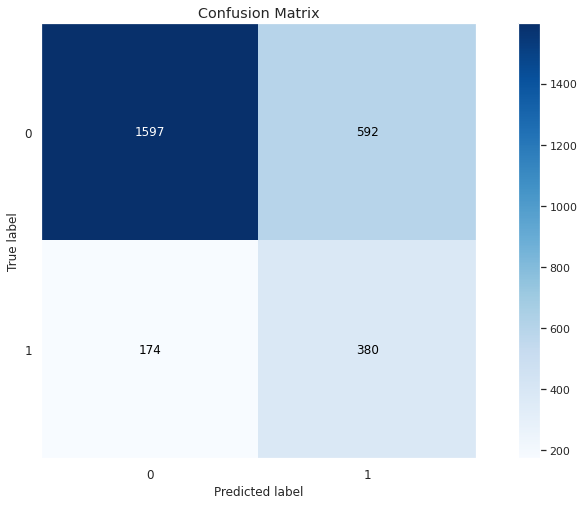

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, normalize=False,figsize=(15,8))

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      2189
           1       0.39      0.69      0.50       554

    accuracy                           0.72      2743
   macro avg       0.65      0.71      0.65      2743
weighted avg       0.80      0.72      0.74      2743



### Building XGboost model

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Generate predictions
y_predict = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)
y_predict

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
df_results = X_test.copy()
df_results['Non_default_pred_proba'] = [round(y_pred_prob[i][0], 3) for i in range(len(y_pred))]
df_results['default_pred_proba'] = [round(y_pred_prob[i][1], 3) for i in range(len(y_pred))]
df_results

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,Non_default_pred_proba,default_pred_proba
12366,25,113000,8.0,14400,11.71,0.13,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.940,0.060
20601,35,62000,15.0,10000,15.33,0.16,10,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.192,0.808
7352,22,59000,6.0,10000,10.99,0.17,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.911,0.089
5475,23,50000,6.0,17000,12.42,0.34,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.844,0.156
26019,44,29088,3.0,7200,11.71,0.25,17,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.764,0.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,22,52800,1.0,2100,6.76,0.04,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.949,0.051
9518,25,82000,2.0,4050,9.99,0.05,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0.983,0.017
10652,22,80000,0.0,15000,11.48,0.19,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.964,0.036
11075,22,85000,4.0,12000,6.91,0.14,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.992,0.008


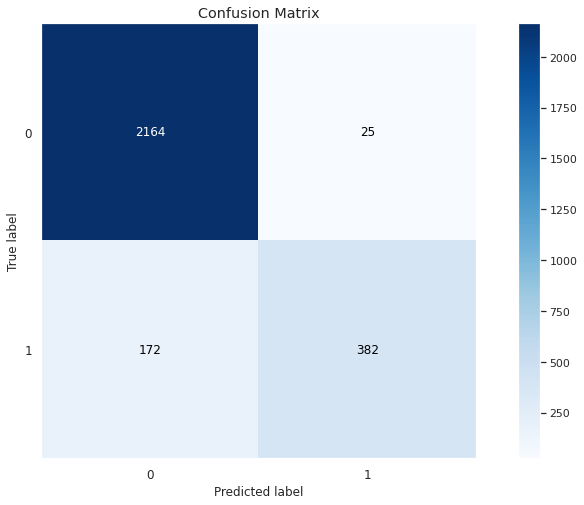

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict, normalize=False,figsize=(15,8))

In [ ]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2189
           1       0.94      0.69      0.80       554

    accuracy                           0.93      2743
   macro avg       0.93      0.84      0.88      2743
weighted avg       0.93      0.93      0.92      2743



### Building the CNN model

In [ ]:
import keras    
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten
from keras.models import Sequential
import tensorflow 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPool1D(pool_size=2))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPool1D(pool_size=3))
    model.add(Flatten())
    model.add(Dense(126, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-3), metrics=['acc'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
# Reshape the datasets
X_train_s = X_train_s.reshape(X_train_s.shape[0], X_train_s.shape[1], 1)
X_test_s = X_test_s.reshape(X_test_s.shape[0], X_test_s.shape[1], 1)
X_val_s = X_val_s.reshape(X_val_s.shape[0], X_val_s.shape[1], 1)

In [ ]:
# Encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
model.fit(X_train_s, y_train, epochs=100, batch_size=128, verbose=2, validation_data=(X_val_s, y_val))

Epoch 1/100
172/172 - 2s - loss: 0.4172 - acc: 0.8306 - val_loss: 0.3553 - val_acc: 0.8637
Epoch 2/100
172/172 - 1s - loss: 0.3242 - acc: 0.8810 - val_loss: 0.3001 - val_acc: 0.8932
Epoch 3/100
172/172 - 1s - loss: 0.3075 - acc: 0.8863 - val_loss: 0.2872 - val_acc: 0.8965
Epoch 4/100
172/172 - 1s - loss: 0.2917 - acc: 0.8952 - val_loss: 0.2775 - val_acc: 0.8968
Epoch 5/100
172/172 - 1s - loss: 0.2873 - acc: 0.8955 - val_loss: 0.2714 - val_acc: 0.9008
Epoch 6/100
172/172 - 1s - loss: 0.2800 - acc: 0.9001 - val_loss: 0.2680 - val_acc: 0.9027
Epoch 7/100
172/172 - 1s - loss: 0.2742 - acc: 0.9005 - val_loss: 0.2761 - val_acc: 0.8997
Epoch 8/100
172/172 - 1s - loss: 0.2708 - acc: 0.9017 - val_loss: 0.2673 - val_acc: 0.9041
Epoch 9/100
172/172 - 1s - loss: 0.2678 - acc: 0.9032 - val_loss: 0.2640 - val_acc: 0.9030
Epoch 10/100
172/172 - 1s - loss: 0.2642 - acc: 0.9046 - val_loss: 0.2671 - val_acc: 0.8968
Epoch 11/100
172/172 - 1s - loss: 0.2575 - acc: 0.9081 - val_loss: 0.2580 - val_acc: 0.90

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 24, 64)            256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            12352     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 126)               24318     
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [ ]:
scores = model.evaluate(X_test_s, y_test)
print(f'Test accuracy : {scores[1]}')

86/86 [==============================] - 0s 3ms/step - loss: 0.2545 - acc: 0.9205
Test accuracy : 0.9205249547958374


In [ ]:
y_pred_prob = model.predict(X_test_s)
y_pred = y_pred_prob.argmax(1)
y_test = y_test.argmax(1)

In [ ]:
df_results = X_test.copy()
df_results['Non_default_pred_proba'] = [round(y_pred_prob[i][0], 3) for i in range(len(y_pred))]
df_results['default_pred_proba'] = [round(y_pred_prob[i][1], 3) for i in range(len(y_pred))]
df_results

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,Non_default_pred_proba,default_pred_proba
12366,25,113000,8.0,14400,11.71,0.13,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.954,0.046
20601,35,62000,15.0,10000,15.33,0.16,10,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000,1.000
7352,22,59000,6.0,10000,10.99,0.17,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.886,0.113
5475,23,50000,6.0,17000,12.42,0.34,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.865,0.133
26019,44,29088,3.0,7200,11.71,0.25,17,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.855,0.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,22,52800,1.0,2100,6.76,0.04,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.884,0.116
9518,25,82000,2.0,4050,9.99,0.05,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1.000,0.000
10652,22,80000,0.0,15000,11.48,0.19,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.906,0.094
11075,22,85000,4.0,12000,6.91,0.14,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1.000,0.000


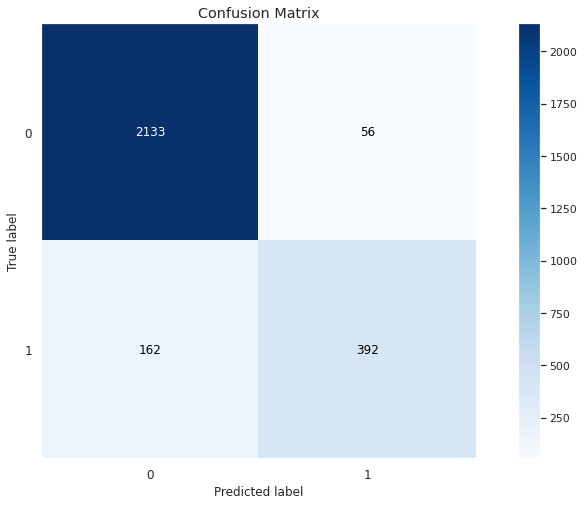

In [ ]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, normalize=False,figsize=(15,8))

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2189
           1       0.88      0.71      0.78       554

    accuracy                           0.92      2743
   macro avg       0.90      0.84      0.87      2743
weighted avg       0.92      0.92      0.92      2743



In [ ]:
Results={
    'Model':['Base (Logistic Regression)','CNN', 'XGBoost'],
    'Accuracy':[0.88, 0.92, 0.93],
    'f1-score':[0.87, 0.91, 0.92],
    'Precision':[0.87, 0.92, 0.93],
    'Recall':[0.88, 0.92, 0.93]
}

results_df=pd.DataFrame(Results).sort_values(by=['Accuracy'], ascending=False)
results_df

,Model,Accuracy,f1-score,Precision,Recall
2,XGBoost,0.93,0.92,0.93,0.93
1,CNN,0.92,0.91,0.92,0.92
0,Base (Logistic Regression),0.88,0.87,0.87,0.88


### **Model Interpretation using SHAP**

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491644 sha256=3a33715e9f3ae7a3d389e42b29a15f58c32a52506f9c2df35b93d9226a57bd9e
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap
# Initialize shap
shap.initjs()

### Shap bar plot

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(xgb_model,feature_names=col_list)
shap_values = explainer(X_train)

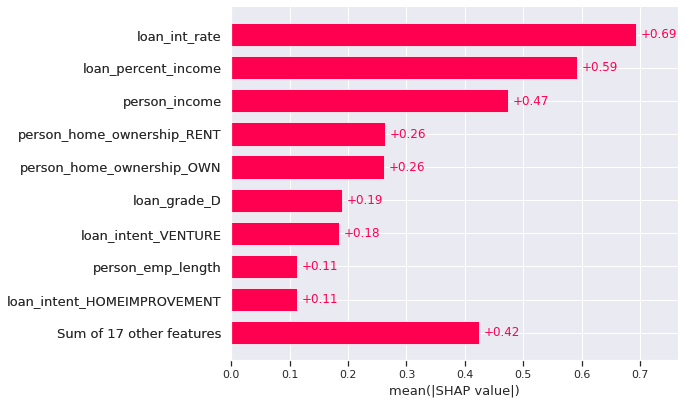

In [ ]:
shap.plots.bar(shap_values)

This takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

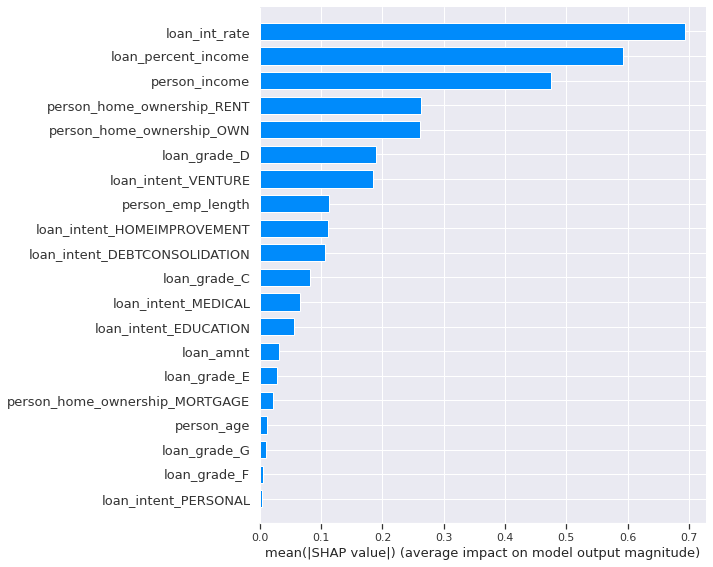

In [ ]:
shap.summary_plot(shap_values, X_train, col_list, plot_type='bar')